# Sklean breast cancer detection using logistic regression
---

## 1. Project setup

### 1.1 Import libraries

In [1]:
import pandas as pd # data manipulation
import numpy as np # numerical computing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # statistical data visualization

from sklearn.model_selection import train_test_split # train-test split
from sklearn.preprocessing import StandardScaler # feature scaling
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.metrics import classification_report, confusion_matrix # evaluation metrics


### 1.2 Load data

In [2]:
from sklearn.datasets import load_breast_cancer # `breast cancer` dataset
data = load_breast_cancer() # loading the dataset as a dictionary-like object
df = pd.DataFrame(data.data, columns=data.feature_names) # creating a DataFrame
df['target'] = data.target # adding the target variable to the DataFrame
df.head(n=2) # displaying the first two rows of the DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


### 1.3. Initial Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


* From df.info() we can see there are no missing or NAN values or we can check using df.isnull()

In [5]:
null_values = df.isnull().values.any() # Check for any null values in the DataFrame
if null_values == True: 
    print("There are some missing values in data")
else:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


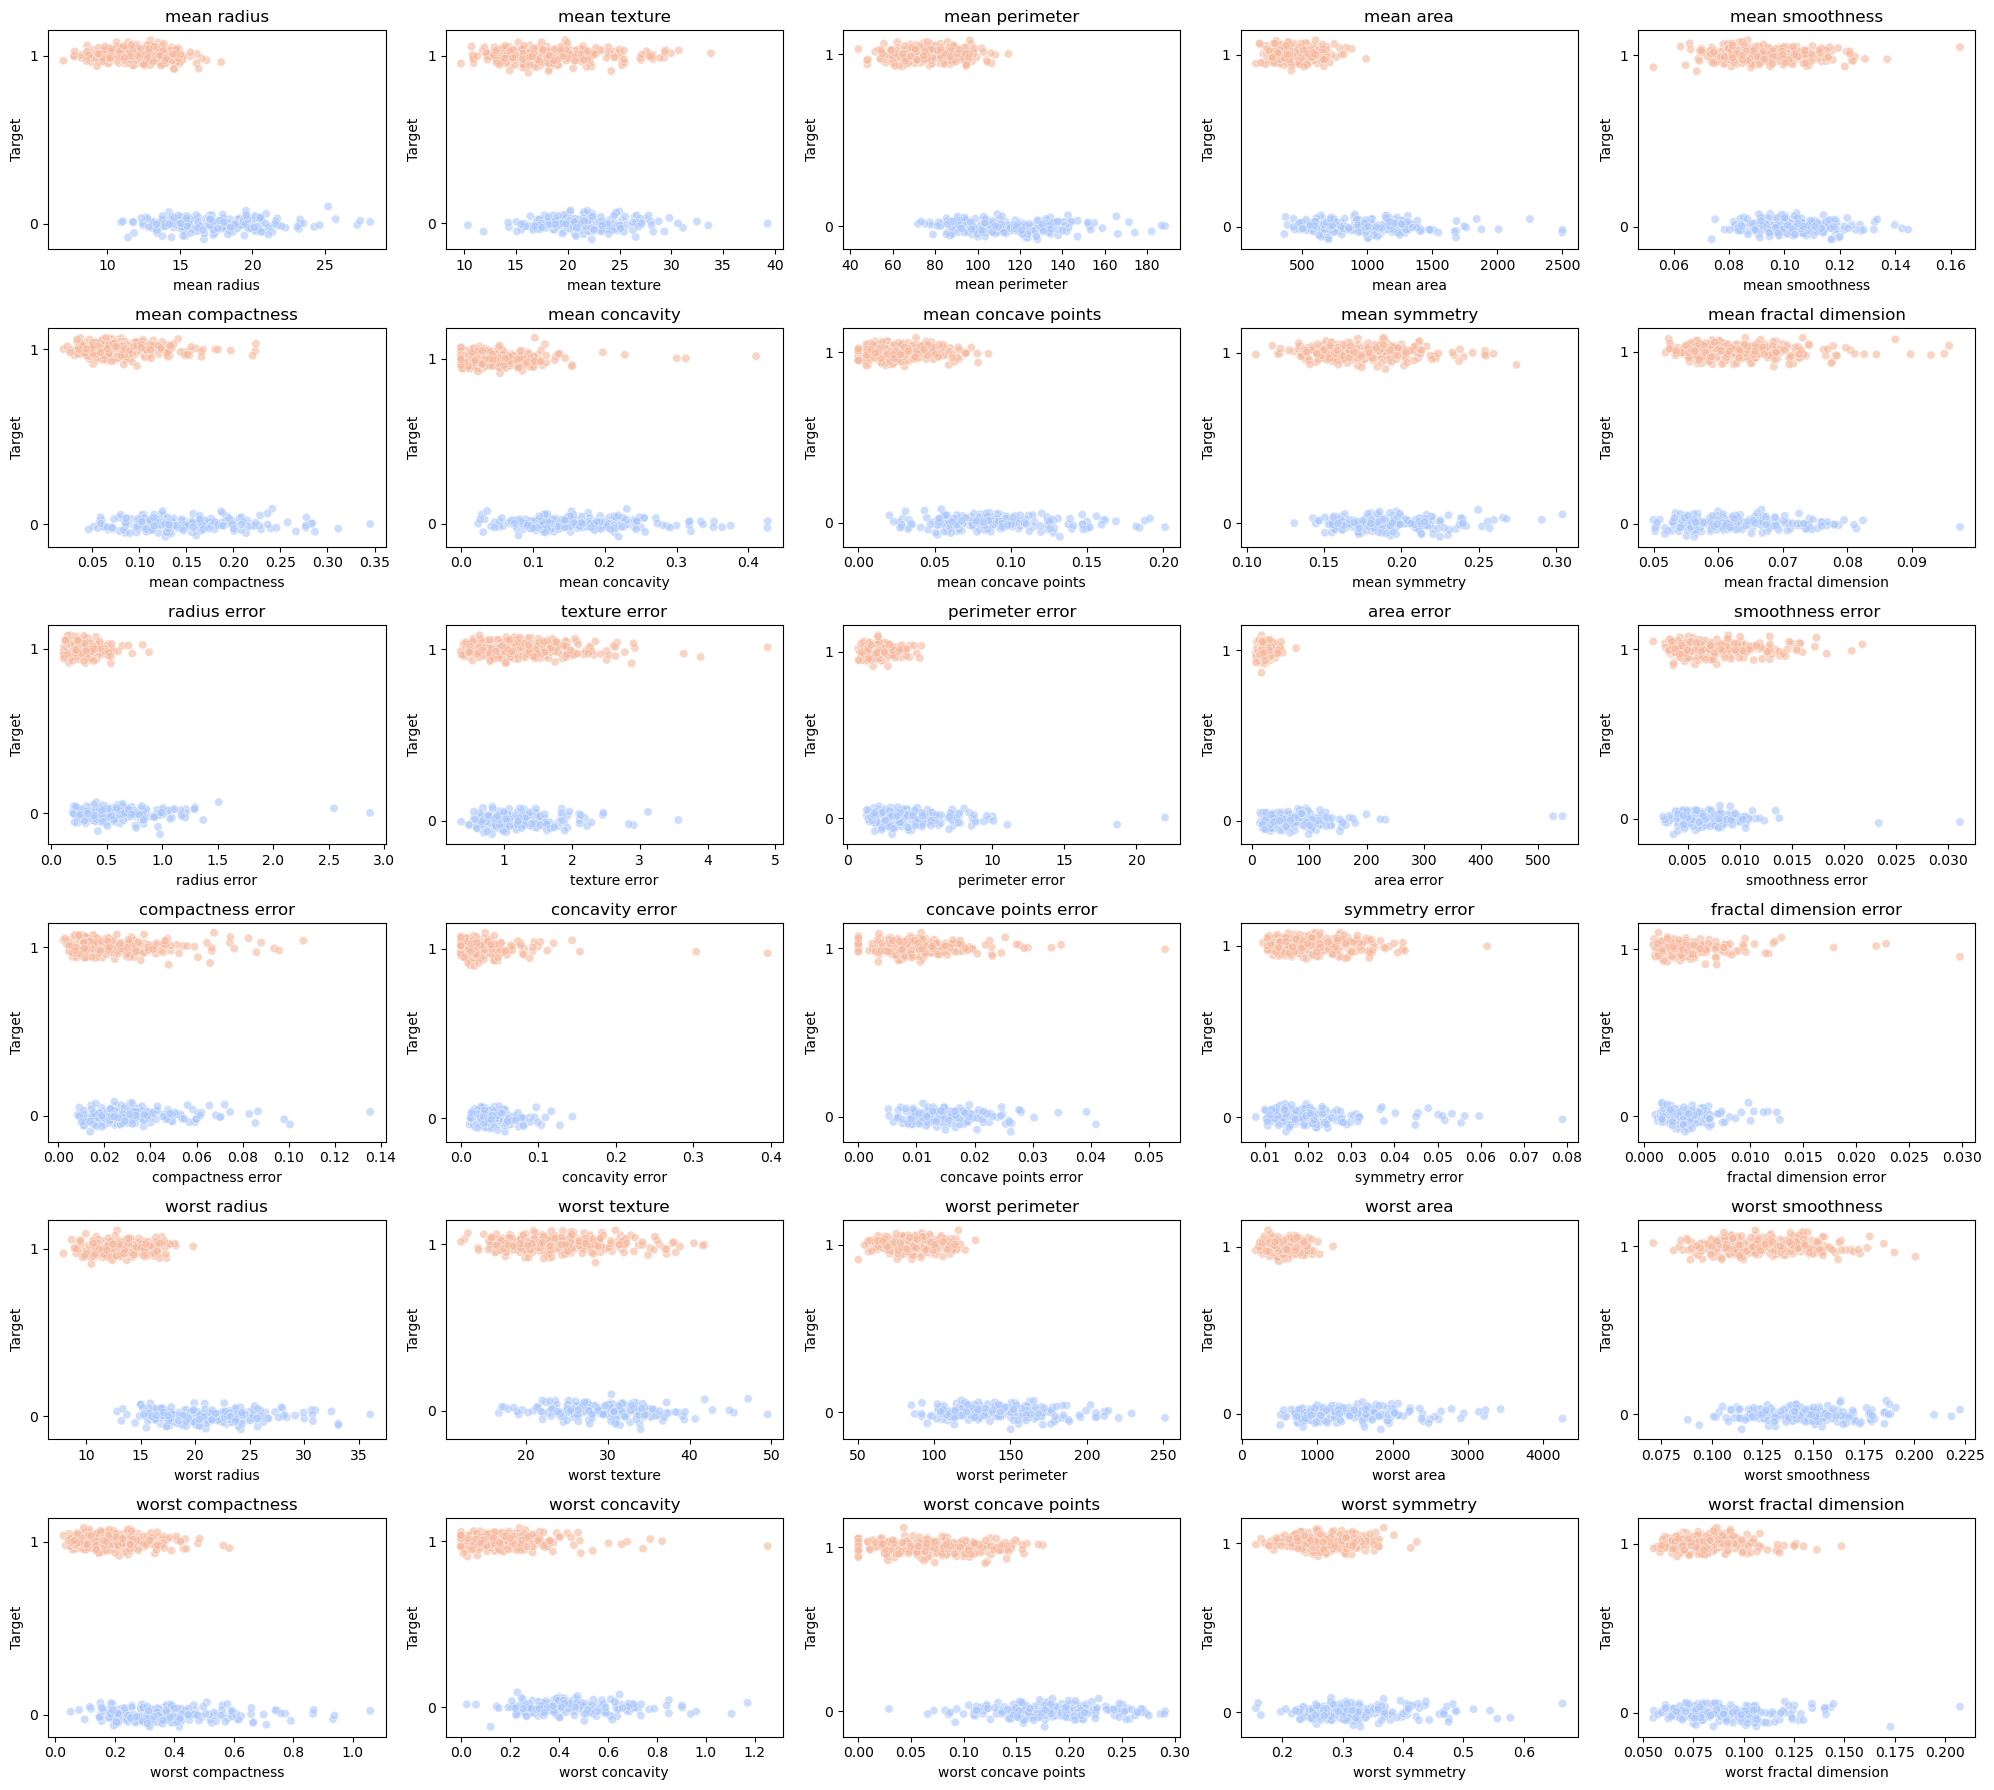

In [9]:
# Scatter plots for all features vs target on a single canvas
features = [c for c in df.columns if c != 'target']
n_features = len(features)
ncols = 5
nrows = int(np.ceil(n_features / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))
axes = axes.flatten()
for i, feat in enumerate(features):
    ax = axes[i]
    # jitter target for visibility since it's binary
    y_jitter = df['target'] + np.random.normal(0, 0.03, size=len(df))
    sns.scatterplot(x=df[feat], y=y_jitter, hue=df['target'], palette='coolwarm', alpha=0.6, ax=ax, legend=False)
    ax.set_title(feat)
    ax.set_ylabel('Target')
    ax.set_yticks([0, 1])
# remove any empty subplots
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()